In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('data')

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


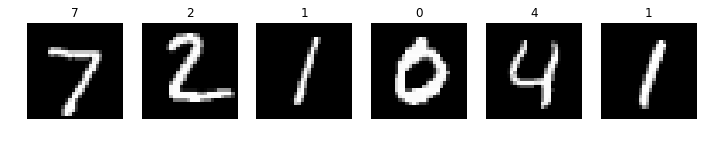

In [3]:
def draw_image(images, labels):
    fig, axes = plt.subplots(1, len(images), figsize=(len(images) * 2, 2))
    for i, ax in enumerate(axes.flat):
        ax.set_axis_off()
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(labels[i])
    plt.show()

draw_image(mnist.test.images[:6], mnist.test.labels[:6])

In [4]:
# https://www.tensorflow.org/api_docs/python/tf/contrib/layers/fully_connected

def layer(x, out_size, activation):
    return tf.contrib.layers.fully_connected(x, out_size, activation)

In [5]:
# https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/BasicLSTMCell
# https://www.tensorflow.org/api_docs/python/tf/nn/static_rnn

def rnn(x, batches, in_size, out_size):
    # list로 분리
    xx = tf.reshape(x, [-1, batches, in_size])
    inputs = tf.unstack(xx, batches, axis=1)

    # Cell 초기화
    cell = tf.contrib.rnn.BasicLSTMCell(out_size)

    # 순환
    outputs, states = tf.contrib.rnn.static_rnn(cell, inputs, dtype=tf.float32)

    # list를 하나로 합침
    output = tf.concat(outputs, axis=1)
    return tf.reshape(output, [-1, batches * out_size])

In [6]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 14 * 28])
y = tf.placeholder(tf.float32, [None, 14 * 28])

keep_prob = tf.placeholder(tf.float32)

z1 = rnn(x, 14, 28, 200)
z2 = layer(z1, 500, tf.nn.relu)
drop = tf.nn.dropout(z2, keep_prob)
z = layer(drop, 14 * 28, tf.nn.sigmoid)

loss = -tf.reduce_mean(y * tf.log(z) + (1 - y) * tf.log(1 - z))

train = tf.train.AdamOptimizer(0.0001).minimize(loss)

In [7]:
test_data = {
    x: mnist.test.images,
    y: mnist.test.labels
}

def draw():
    shuffle = np.random.permutation(mnist.test.labels.shape[0])

    labels = mnist.test.labels[shuffle][:5]
    images1 = mnist.test.images[:, :14 * 28][shuffle][:5]
    images2 = session.run(z, feed_dict={ x: images1, keep_prob: 1.0 })
    images = np.concatenate([images1, images2], axis=1)

    draw_image(images, labels)

1


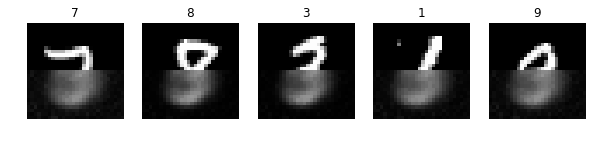

2


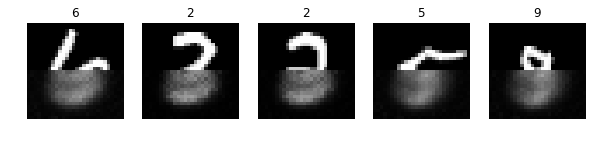

3


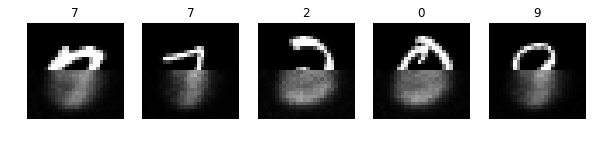

4


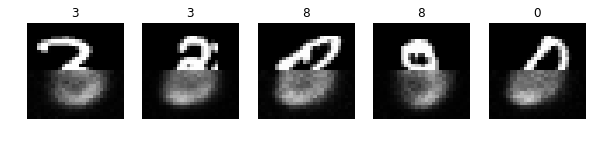

5


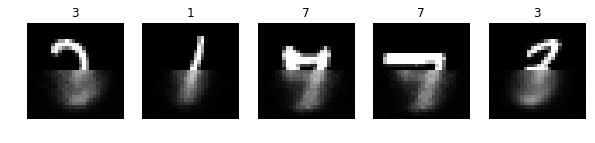

6


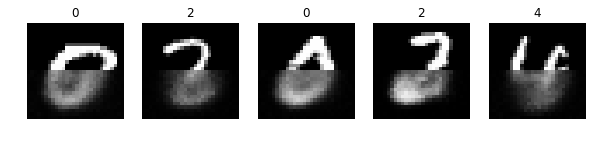

7


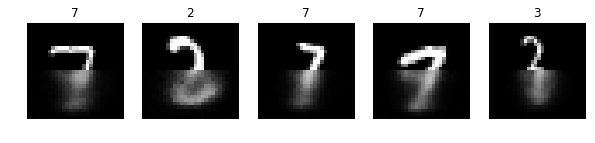

8


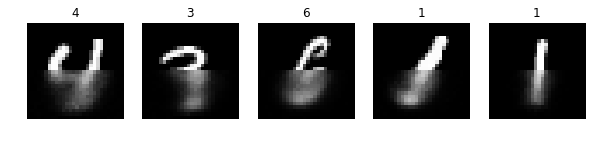

9


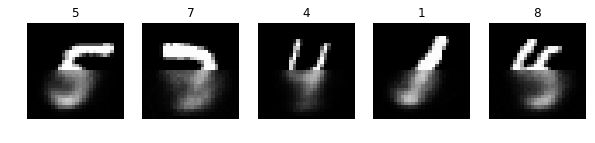

10


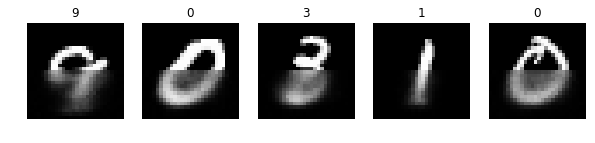

In [8]:
session = tf.Session()
session.run(tf.global_variables_initializer())

batch_size = 100

for i in range(10):
    print(i + 1)
    for j in range(100):
        images, labels = mnist.train.next_batch(batch_size)
        parts = np.split(images, 2, axis=1)
        data = {
            x: parts[0],
            y: parts[1],
            keep_prob: 0.5
        }
        session.run(train, feed_dict=data)
    draw()

---

Lorem Ipsum - Lipsum generator

http://www.lipsum.com/

In [9]:
import re

with open('data.txt') as f:
    read_data = f.read()

text = re.sub('\s+', '', read_data)

text

'손닿을수없는저기어딘가오늘도넌숨쉬고있지만너와머물던작은의자위엔같은모습의바람이지나네너는떠나며마치날떠나가듯이멀리손을흔들며언젠간추억에남겨져갈거라고그리워하면언젠간만나게되는어느영화와같은일들이이루어져가기를힘겨워한날에너를지킬수없었던아름다운시절속에머문그대이기에너는떠나며마치날떠나가듯이멀리손을흔들며언젠간추억에남겨져갈거라고그리워하면언젠간만나게되는어느영화와같은일들이이루어져가기를힘겨워한날에너를지킬수없었던아름다운시절속에머문그대여그리워하면언젠간만나게되는어느영화와같은일들이이루어져가기를힘겨워한날에너를지킬수없었던아름다운시절속에머문그대이기에'

In [10]:
chars = list(set(text))

np.array(chars)

array(['늘', '대', '겨', '나', '화', '위', '에', '여', '마', '날', '간', '며', '오',
       '바', '언', '머', '이', '람', '남', '지', '던', '었', '힘', '갈', '저', '되',
       '다', '기', '수', '숨', '듯', '그', '손', '습', '는', '을', '떠', '의', '킬',
       '닿', '한', '흔', '게', '운', '라', '와', '절', '워', '를', '네', '작', '추',
       '영', '물', '같', '너', '하', '도', '치', '억', '있', '넌', '시', '만', '일',
       '어', '쉬', '루', '름', '들', '져', '문', '젠', '딘', '면', '아', '거', '은',
       '없', '속', '자', '멀', '리', '모', '고', '가', '엔', '느'],
      dtype='<U1')

In [11]:
num_chars = len(chars)
num_inputs = 10

num_chars

88

In [12]:
x_data = []
y_data = []

for i in range(len(text) - num_inputs):
    x_data.append([chars.index(x) for x in list(text[i:i + num_inputs])])
    y_data.append(chars.index(text[i + num_inputs]))

x_data = np.array(x_data)
y_data = np.array(y_data)

x_data.shape, y_data.shape

((274, 10), (274,))

In [13]:
tf.reset_default_graph()

x = tf.placeholder(tf.int64, [None, num_inputs])
y = tf.placeholder(tf.int64, [None])

keep_prob = tf.placeholder(tf.float32)

xx = tf.one_hot(x, num_chars)
yy = tf.one_hot(y, num_chars)

z1 = rnn(xx, num_inputs, num_chars, 50)
z2 = layer(z1, 100, tf.nn.relu)
drop = tf.nn.dropout(z2, keep_prob)
z = layer(drop, num_chars, tf.nn.softmax)

label = tf.argmax(z, axis=1)

loss = -tf.reduce_mean(yy * tf.log(z))

train = tf.train.AdamOptimizer(0.0001).minimize(loss)

In [14]:
session = tf.Session()
session.run(tf.global_variables_initializer())

data = {
    x: x_data,
    y: y_data,
    keep_prob: 0.5
}

for i in range(30):
    print(i + 1)
    for j in range(100):
        session.run(train, feed_dict=data)
    print(session.run(loss, feed_dict=data))

1
0.0496641
2
0.046052
3
0.0391036
4
0.0307957
5
0.0265492
6
0.0222374
7
0.018427
8
0.0160256
9
0.0120352
10
0.0108745
11
0.0088517
12
0.0077943
13
0.00677371
14
0.0058123
15
0.00481136
16
0.00370135
17
0.00358549
18
0.00318675
19
0.0028757
20
0.00259933
21
0.00218356
22
0.00186345
23
0.00180252
24
0.0014404
25
0.00182414
26
0.00118983
27
0.00104847
28
0.00115142
29
0.00101464
30
0.000905035


In [15]:
inputs = [chars.index(x) for x in list('오늘도넌숨쉬고있지만')]

for i in range(30):
    output = session.run(label, feed_dict={
        x: [inputs[-10:]],
        keep_prob: 1.0
    })
    inputs = np.hstack([inputs, output])

print(''.join(chars[x] for x in inputs.tolist()))

오늘도넌숨쉬고있지만너와머물던작은의자위엔같은모습의바람이지나네너는떠나며마치날
